In [19]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import numpy as np


In [24]:
chrome_driver_path = "/opt/homebrew/bin/chromedriver"  # Example path, update accordingly
s = Service(chrome_driver_path)
# Service initializes the ChromeDriver executable service with the specified path
driver = webdriver.Chrome(service=s) 
driver.get('https://www.glassdoor.co.in/Job/index.htm')

time.sleep(2)

In [16]:
search=driver.find_element(By.XPATH,value='''//*[@id="searchBar-jobTitle"]''')
search.send_keys('Data Analyst')
search.send_keys(Keys.ENTER)
location=driver.find_element(By.XPATH, value='''//*[@id="searchBar-location"]''')
location.send_keys('Pune')
time.sleep(1)
location.send_keys(Keys.ENTER)
time.sleep(2)

In [17]:
conts=driver.find_element(By.CSS_SELECTOR,'ul[class="JobsList_jobsList__lqjTr"]')
boxes=conts.find_elements(By.CSS_SELECTOR,'li[class="JobsList_jobListItem__wjTHv JobsList_dividerWithSelected__nlvH7"]')

In [20]:

jobs = [
    ['Job_Title', 'Company _Name', 'Rating', 'Location', 'Salary', 'Skills', 'Description']
]

for box in boxes:
    try:
        title = box.find_element(By.CSS_SELECTOR, 'a[class="JobCard_jobTitle___7I6y"]').text
    except:
        title = np.nan
        
    try:
        company = box.find_element(By.CSS_SELECTOR, 'div[class="EmployerProfile_employerNameContainer__tb7JV"]').text
    except:
        company = np.nan
        
    try:
        location = box.find_element(By.CSS_SELECTOR, 'div[class="JobCard_location__rCz3x"]').text
    except:
        location = np.nan
        
    try:
        salary = box.find_element(By.CSS_SELECTOR, 'div[class="JobCard_salaryEstimate__arV5J"]').text[:-16]
    except:
        salary = np.nan
        
    try: 
        description = box.find_element(By.CSS_SELECTOR, 'div[class="JobCard_jobDescriptionSnippet__yWW8q"]').text.split('\n')[0]
    except:
        description = np.nan
        
    try:
        skills = box.find_element(By.CSS_SELECTOR, 'div[class="JobCard_jobDescriptionSnippet__yWW8q"]').text.split('\n')[1].split(':')[1]

    except:
        skills = np.nan

    try:
        rating = box.find_element(By.CSS_SELECTOR, 'div[class="EmployerProfile_ratingContainer__ul0Ef"]').text
    except:
        rating = np.nan

    jobs.append([title, company, rating, location, salary, skills, description])

driver.quit()
import pandas as pd

df1 = pd.DataFrame(jobs[1:], columns = jobs[0])
df1.head()

,Job_Title,Company _Name,Rating,Location,Salary,Skills,Description
0,Data Analyst,Dilizent Systems,NaN,Pimpri-Chinchwad,NaN,"Data analysis skills, SQL, Analysis skills, A...",- Stay updated with industry trends and best p...
1,Applications Development Sr Programmer Analyst...,Citi,3.7,Pune,₹7L - ₹10L,"CI/CD, Power BI, Data modeling, Oracle, Busin...",By applying their knowledge of data architectu...
2,Procurement Data Analyst - Audit & Compliance,CrowdStrike,3.8,Pune,₹4L - ₹7L,"Microsoft Word, Microsoft Outlook, Procuremen...",Prepare written reports on assigned engagement...
3,Geospatial Data Analyst,IDOX plc,3.4,Pune,₹4L - ₹10L,"Microsoft Excel, PostGIS, Information securit...","As an Intermediate level Data Analyst, you wil..."
4,GHG Data Analyst,Tarento Group,4.0,Pune,NaN,"Power BI, Microsoft Office, Databases, Analys...",Experience and proven track record of excellen...


In [21]:
df1.to_csv('glassdoor_jobs_pune.csv', index = False)

In [33]:
pune=pd.read_csv('glassdoor_jobs_pune.csv')
pune

,Job_Title,Company _Name,Rating,Location,Salary,Skills,Description
0,Data Analyst,Dilizent Systems,NaN,Pimpri-Chinchwad,NaN,"Data analysis skills, SQL, Analysis skills, A...",- Stay updated with industry trends and best p...
1,Applications Development Sr Programmer Analyst...,Citi,3.7,Pune,₹7L - ₹10L,"CI/CD, Power BI, Data modeling, Oracle, Busin...",By applying their knowledge of data architectu...
2,Procurement Data Analyst - Audit & Compliance,CrowdStrike,3.8,Pune,₹4L - ₹7L,"Microsoft Word, Microsoft Outlook, Procuremen...",Prepare written reports on assigned engagement...
3,Geospatial Data Analyst,IDOX plc,3.4,Pune,₹4L - ₹10L,"Microsoft Excel, PostGIS, Information securit...","As an Intermediate level Data Analyst, you wil..."
4,GHG Data Analyst,Tarento Group,4.0,Pune,NaN,"Power BI, Microsoft Office, Databases, Analys...",Experience and proven track record of excellen...
5,Data Analyst,Wipro Limited,3.6,Pune,₹4L - ₹6L,"MATLAB, Microsoft Excel, SQL, Data analytics,...",The purpose of this role is to interpret data ...
6,"Associate, Data Analyst",TIAA,3.7,Pune,₹10L - ₹11L,"Power BI, Microsoft Excel, Data mining, Busin...",This job directs the examination and identific...
7,Data Analyst - A,Capgemini,3.9,Pune,₹4L - ₹5L,NaN,They ensure that the data sources and reposito...
8,PAM Data Analyst,Deutsche Bank,3.9,Pune,NaN,"Microsoft Word, Microsoft Excel, Microsoft SQ...",The successful candidate must be able to work ...
9,Data Analyst,SuperGaming,4.1,Pune,₹5L - ₹9L,"iOS, R, Docker, Cloud development, Communicat...","You will play a crucial role in designing, dev..."


In [28]:
chrome_driver_path = "/opt/homebrew/bin/chromedriver"  # Example path, update accordingly
s = Service(chrome_driver_path)
# Service initializes the ChromeDriver executable service with the specified path
driver = webdriver.Chrome(service=s) 
driver.get('https://www.glassdoor.co.in/Job/index.htm')

time.sleep(2)
search=driver.find_element(By.XPATH,value='''//*[@id="searchBar-jobTitle"]''')
search.send_keys('Data Analyst')
search.send_keys(Keys.ENTER)
location=driver.find_element(By.XPATH, value='''//*[@id="searchBar-location"]''')
location.send_keys('Bengaluru')
time.sleep(1)
location.send_keys(Keys.ENTER)
time.sleep(2)

In [29]:
conts=driver.find_element(By.CSS_SELECTOR,'ul[class="JobsList_jobsList__lqjTr"]')
boxes=conts.find_elements(By.CSS_SELECTOR,'li[class="JobsList_jobListItem__wjTHv JobsList_dividerWithSelected__nlvH7"]')

In [30]:
jobs = [
    ['Job_Title', 'Company _Name', 'Rating', 'Location', 'Salary', 'Skills', 'Description']
]

for box in boxes:
    try:
        title = box.find_element(By.CSS_SELECTOR, 'a[class="JobCard_jobTitle___7I6y"]').text
    except:
        title = np.nan
        
    try:
        company = box.find_element(By.CSS_SELECTOR, 'div[class="EmployerProfile_employerNameContainer__tb7JV"]').text
    except:
        company = np.nan
        
    try:
        location = box.find_element(By.CSS_SELECTOR, 'div[class="JobCard_location__rCz3x"]').text
    except:
        location = np.nan
        
    try:
        salary = box.find_element(By.CSS_SELECTOR, 'div[class="JobCard_salaryEstimate__arV5J"]').text[:-16]
    except:
        salary = np.nan
        
    try: 
        description = box.find_element(By.CSS_SELECTOR, 'div[class="JobCard_jobDescriptionSnippet__yWW8q"]').text.split('\n')[0]
    except:
        description = np.nan
        
    try:
        skills = box.find_element(By.CSS_SELECTOR, 'div[class="JobCard_jobDescriptionSnippet__yWW8q"]').text.split('\n')[1].split(':')[1]

    except:
        skills = np.nan

    try:
        rating = box.find_element(By.CSS_SELECTOR, 'div[class="EmployerProfile_ratingContainer__ul0Ef"]').text
    except:
        rating = np.nan

    jobs.append([title, company, rating, location, salary, skills, description])



import pandas as pd

df2 = pd.DataFrame(jobs[1:], columns = jobs[0])
df2.head()

,Job_Title,Company _Name,Rating,Location,Salary,Skills,Description
0,Data Analyst,Kwalee,3.7,Bengaluru,₹10L - ₹11L,"A/B testing, Data visualization","Strong ability to analyse and manipulate data,..."
1,Data Analyst,SCALEUP IT SOLUTION,NaN,India,NaN,NaN,.Contribute to efforts focused on data quality...
2,Client Data Specialist/Analyst,JPMorganChase,4.0,Bengaluru,₹7L - ₹9L,"Research, Analysis skills",As a Client Data specialist/ analyst within ou...
3,Data Analyst,Unitom Education Centre - A unit of Unitom,NaN,Bengaluru,₹4L - ₹6L,"Power BI, R, English, Tableau, SQL",*Communication Skills:* Ability to present com...
4,Data Analyst,SmartQ Bottle Lab Technologies Pvt Ltd,4.5,Bengaluru,₹4L - ₹7L,Data management,We are seeking an experienced Data Analyst wit...


In [34]:
df2.to_csv('Bengaluru.csv', index = False)

In [37]:
bng=pd.read_csv('Bengaluru.csv')
bng

,Job_Title,Company _Name,Rating,Location,Salary,Skills,Description
0,Data Analyst,Kwalee,3.7,Bengaluru,₹10L - ₹11L,"A/B testing, Data visualization","Strong ability to analyse and manipulate data,..."
1,Data Analyst,SCALEUP IT SOLUTION,NaN,India,NaN,NaN,.Contribute to efforts focused on data quality...
2,Client Data Specialist/Analyst,JPMorganChase,4.0,Bengaluru,₹7L - ₹9L,"Research, Analysis skills",As a Client Data specialist/ analyst within ou...
3,Data Analyst,Unitom Education Centre - A unit of Unitom,NaN,Bengaluru,₹4L - ₹6L,"Power BI, R, English, Tableau, SQL",*Communication Skills:* Ability to present com...
4,Data Analyst,SmartQ Bottle Lab Technologies Pvt Ltd,4.5,Bengaluru,₹4L - ₹7L,Data management,We are seeking an experienced Data Analyst wit...
5,Data Analyst -1,Cashfree Payments,3.7,Bengaluru,NaN,"Tableau, SQL, AWS, B2B, Direct sales","Assemble large, complex data sets that meet bu..."
6,Data Analyst,Netscribes Data & Insights Private Limited,NaN,Bengaluru,NaN,"Power BI, Microsoft Excel, Data analysis skil...","Good in SQL, advanced Excel & Power BI. Should..."
7,Data Analyst,Valenta BPO,4.0,Bengaluru,₹5L - ₹6L,"Power BI, Microsoft Excel, Data analysis skil...",As a Data Analyst you will play a pivotal role...
8,Power BI/Data Analytics,LTIMindtree,3.5,Bengaluru,₹5L - ₹9L,"Power BI, Tableau",Role description Google Looker Power BI Tablea...
9,Client Data Analyst,JPMorganChase,4.0,Bengaluru,₹6L - ₹9L,"Research, Analysis skills",As a Client Data Team Member within our KYC/AM...


In [38]:
pbg=pd.concat([pune, bng], axis = 0).reset_index(drop = True)
pbg

,Job_Title,Company _Name,Rating,Location,Salary,Skills,Description
0,Data Analyst,Dilizent Systems,NaN,Pimpri-Chinchwad,NaN,"Data analysis skills, SQL, Analysis skills, A...",- Stay updated with industry trends and best p...
1,Applications Development Sr Programmer Analyst...,Citi,3.7,Pune,₹7L - ₹10L,"CI/CD, Power BI, Data modeling, Oracle, Busin...",By applying their knowledge of data architectu...
2,Procurement Data Analyst - Audit & Compliance,CrowdStrike,3.8,Pune,₹4L - ₹7L,"Microsoft Word, Microsoft Outlook, Procuremen...",Prepare written reports on assigned engagement...
3,Geospatial Data Analyst,IDOX plc,3.4,Pune,₹4L - ₹10L,"Microsoft Excel, PostGIS, Information securit...","As an Intermediate level Data Analyst, you wil..."
4,GHG Data Analyst,Tarento Group,4.0,Pune,NaN,"Power BI, Microsoft Office, Databases, Analys...",Experience and proven track record of excellen...
5,Data Analyst,Wipro Limited,3.6,Pune,₹4L - ₹6L,"MATLAB, Microsoft Excel, SQL, Data analytics,...",The purpose of this role is to interpret data ...
6,"Associate, Data Analyst",TIAA,3.7,Pune,₹10L - ₹11L,"Power BI, Microsoft Excel, Data mining, Busin...",This job directs the examination and identific...
7,Data Analyst - A,Capgemini,3.9,Pune,₹4L - ₹5L,NaN,They ensure that the data sources and reposito...
8,PAM Data Analyst,Deutsche Bank,3.9,Pune,NaN,"Microsoft Word, Microsoft Excel, Microsoft SQ...",The successful candidate must be able to work ...
9,Data Analyst,SuperGaming,4.1,Pune,₹5L - ₹9L,"iOS, R, Docker, Cloud development, Communicat...","You will play a crucial role in designing, dev..."


In [ ]:
# Concatenate the DataFrames and reset the index
pbg = pd.concat([pune, bng], axis=0).reset_index(drop=True)

# Save the concatenated DataFrame to a new CSV file
pbg.to_csv('combined_pune_bangalore.csv', index=False)

In [39]:
pbg.dtypes

Job_Title         object
Company _Name     object
Rating           float64
Location          object
Salary            object
Skills            object
Description       object
dtype: object

In [41]:
pbg.drop('Description', axis=1 ,inplace=True)

In [42]:
pbg

,Job_Title,Company _Name,Rating,Location,Salary,Skills
0,Data Analyst,Dilizent Systems,NaN,Pimpri-Chinchwad,NaN,"Data analysis skills, SQL, Analysis skills, A..."
1,Applications Development Sr Programmer Analyst...,Citi,3.7,Pune,₹7L - ₹10L,"CI/CD, Power BI, Data modeling, Oracle, Busin..."
2,Procurement Data Analyst - Audit & Compliance,CrowdStrike,3.8,Pune,₹4L - ₹7L,"Microsoft Word, Microsoft Outlook, Procuremen..."
3,Geospatial Data Analyst,IDOX plc,3.4,Pune,₹4L - ₹10L,"Microsoft Excel, PostGIS, Information securit..."
4,GHG Data Analyst,Tarento Group,4.0,Pune,NaN,"Power BI, Microsoft Office, Databases, Analys..."
5,Data Analyst,Wipro Limited,3.6,Pune,₹4L - ₹6L,"MATLAB, Microsoft Excel, SQL, Data analytics,..."
6,"Associate, Data Analyst",TIAA,3.7,Pune,₹10L - ₹11L,"Power BI, Microsoft Excel, Data mining, Busin..."
7,Data Analyst - A,Capgemini,3.9,Pune,₹4L - ₹5L,NaN
8,PAM Data Analyst,Deutsche Bank,3.9,Pune,NaN,"Microsoft Word, Microsoft Excel, Microsoft SQ..."
9,Data Analyst,SuperGaming,4.1,Pune,₹5L - ₹9L,"iOS, R, Docker, Cloud development, Communicat..."


In [43]:
pbg.isna().sum()

Job_Title         0
Company _Name     0
Rating           12
Location          0
Salary           18
Skills            3
dtype: int64

In [44]:
import re

# Define a function to clean and convert salary ranges to a single float value
def convert_salary(salary_range):
    if isinstance(salary_range, str):
        # Remove non-numeric characters (₹, L, spaces) and split the range
        numbers = re.findall(r'\d+', salary_range)
        if len(numbers) == 2:
            min_salary = int(numbers[0]) * 1e5  # Assuming 'L' represents lakhs
            max_salary = int(numbers[1]) * 1e5
            avg_salary = (min_salary + max_salary) / 2
            return avg_salary
        elif len(numbers) == 1:
            return int(numbers[0]) * 1e5
    return None  # For cases where there's no valid data

# Apply the function to the Salary column and convert to float
pbg['Salary'] = pbg['Salary'].apply(convert_salary).astype(float)

In [45]:
pbg

,Job_Title,Company _Name,Rating,Location,Salary,Skills
0,Data Analyst,Dilizent Systems,NaN,Pimpri-Chinchwad,NaN,"Data analysis skills, SQL, Analysis skills, A..."
1,Applications Development Sr Programmer Analyst...,Citi,3.7,Pune,850000.0,"CI/CD, Power BI, Data modeling, Oracle, Busin..."
2,Procurement Data Analyst - Audit & Compliance,CrowdStrike,3.8,Pune,550000.0,"Microsoft Word, Microsoft Outlook, Procuremen..."
3,Geospatial Data Analyst,IDOX plc,3.4,Pune,700000.0,"Microsoft Excel, PostGIS, Information securit..."
4,GHG Data Analyst,Tarento Group,4.0,Pune,NaN,"Power BI, Microsoft Office, Databases, Analys..."
5,Data Analyst,Wipro Limited,3.6,Pune,500000.0,"MATLAB, Microsoft Excel, SQL, Data analytics,..."
6,"Associate, Data Analyst",TIAA,3.7,Pune,1050000.0,"Power BI, Microsoft Excel, Data mining, Busin..."
7,Data Analyst - A,Capgemini,3.9,Pune,450000.0,NaN
8,PAM Data Analyst,Deutsche Bank,3.9,Pune,NaN,"Microsoft Word, Microsoft Excel, Microsoft SQ..."
9,Data Analyst,SuperGaming,4.1,Pune,700000.0,"iOS, R, Docker, Cloud development, Communicat..."


In [46]:
pbg.dtypes

Job_Title         object
Company _Name     object
Rating           float64
Location          object
Salary           float64
Skills            object
dtype: object

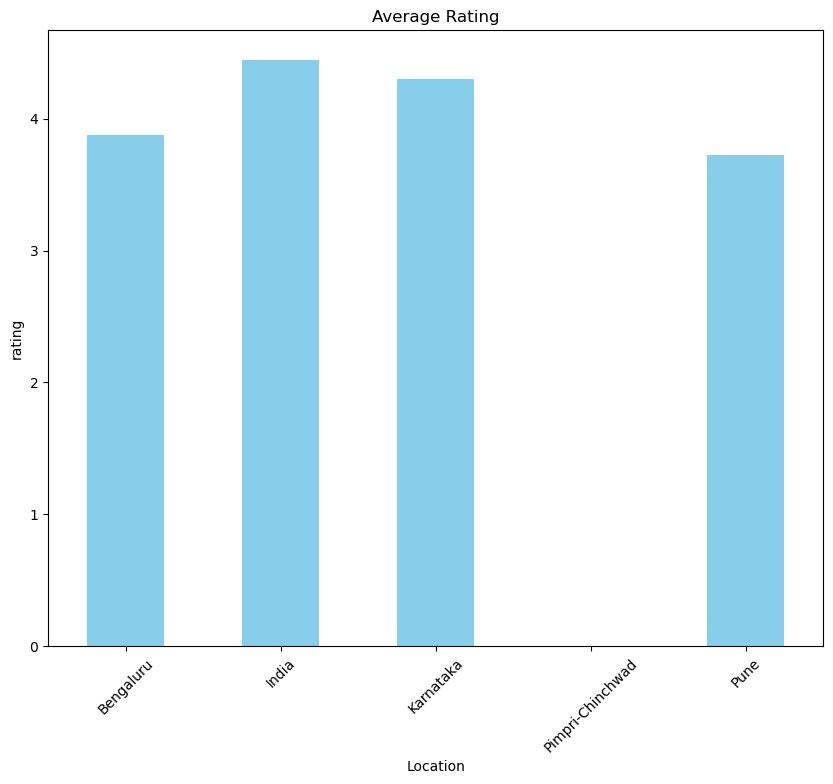

In [47]:
import matplotlib.pyplot as plt
loca=pbg.groupby('Location')['Rating'].mean()

plt.figure(figsize=(10,8))
loca.plot(kind='bar',color='skyblue')
plt.xlabel('Location')
plt.ylabel('rating')
plt.title('Average Rating')
plt.xticks(rotation=45)
plt.show()

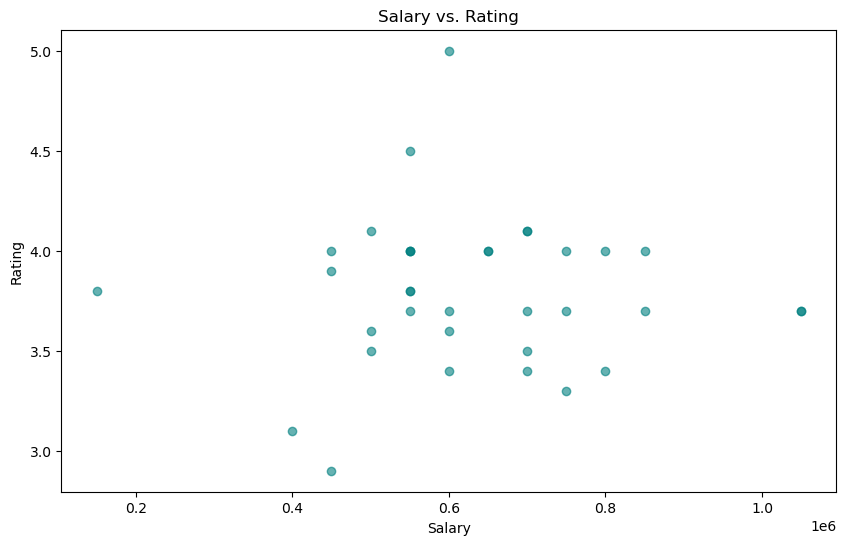

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(pbg['Salary'], pbg['Rating'], color='teal', alpha=0.6)
plt.xlabel('Salary')
plt.ylabel('Rating')
plt.title('Salary vs. Rating')
plt.show()

In [51]:
# Load the CSV files
pune = pd.read_csv('glassdoor_jobs_pune.csv')
bng = pd.read_csv('Bengaluru.csv')

# Concatenate the DataFrames and reset the index
pbg = pd.concat([pune, bng], axis=0).reset_index(drop=True)

# Save the concatenated DataFrame to a new CSV file
pbg.to_csv('combined_pune_bangalore.csv', index=False)

In [56]:
nh = pd.read_csv('again.csv', encoding='ISO-8859-1')


In [57]:
nh

,Job_Title,Company _Name,Rating,Location,Salary,Skills,Description,Unnamed: 7,Unnamed: 8
0,Data Analyst,Innoage Technologies Pvt. Ltd.,NaN,Noida,450000,"Microsoft Excel, Data analysis skills, Wareho...","As a Purchase Analyst, you will play a crucial...",NaN,NaN
1,Junior Data Analysts,RMSI,3.5,Noida,450000,"Statistics, Computer science, Data analysis s...",Strong foundation in data analysis and a keen ...,NaN,NaN
2,Data Analyst,Eninrac Consulting,5,Noida,400000,"Microsoft Powerpoint, English, Analysis skill...",Eninrac is looking for data analyst who will b...,NaN,NaN
3,Business Analyst - Intern,MyOperator,4.3,Noida,18000,"Power BI, Tableau, Project management",Stakeholder Communication: Liaise with various...,NaN,NaN
4,Data Analyst,Spice Money,4.2,Noida,NaN,"SQL, Python",Employ statistical techniques to scrutinize da...,NaN,NaN
5,Data Analyst,DistrictD (Utopian Dreams Pvt. Ltd.),NaN,India,300000,"Microsoft Word, Microsoft Excel, Data analysi...",Note:- Preferred immediate Joiner or maximum 1...,NaN,NaN
6,Data Analyst,Optum,3.5,Noida,850000,"Power BI, Business intelligence, Big data, Da...",Comply with the terms and conditions of the em...,NaN,NaN
7,Data Analyst,Magic Bus India Foundation,3.6,Noida,NaN,"Microsoft Excel, Data mining, Microsoft Offic...",Data mining and data cleaning. Maintaining dat...,NaN,NaN
8,Data Analyst,India- X Delivery,Boston Consulting Group,4.3,Gurgaon,700000,"Microsoft Powerpoint, Power BI, Microsoft Exc...",You will collaborate with PA or case teams to ...,NaN
9,Data Analyst,Business Modelling,India- X Delivery,Boston Consulting Group,4.3,Gurgaon,700000,"Microsoft Powerpoint, Power BI, Microsoft Exc...",You will collaborate with various teams to gat...


In [59]:
nh.drop(['Description', 'Unnamed: 7', 'Unnamed: 8'], axis=1, inplace=True)

In [63]:
# Concatenate the two datasets
combined_data = pd.concat([nh, pbg], axis=0).reset_index(drop=True)

# Convert Salary to numeric range for analysis
def convert_salary(salary_range):
    if isinstance(salary_range, str):
        parts = salary_range.split(' - ')
        if len(parts) == 2:
            min_salary = int(parts[0].replace('₹', '').replace('L', '').strip()) * 100000
            max_salary = int(parts[1].replace('₹', '').replace('L', '').strip()) * 100000
            return (min_salary, max_salary)
    return (None, None)

# Apply the conversion to the Salary column
combined_data[['Min_Salary', 'Max_Salary']] = combined_data['Salary'].apply(convert_salary).apply(pd.Series)

# Convert Rating to numeric (if necessary)
combined_data['Rating'] = pd.to_numeric(combined_data['Rating'], errors='coerce')

# Insights
average_rating = combined_data['Rating'].mean()
average_min_salary = combined_data['Min_Salary'].mean() if combined_data['Min_Salary'].notnull().any() else 0
average_max_salary = combined_data['Max_Salary'].mean() if combined_data['Max_Salary'].notnull().any() else 0

# Print insights
print("Insights from the combined data:")
print(f"Total Job Listings: {len(combined_data)}")
print(f"Average Rating: {average_rating:.2f}")
print(f"Average Minimum Salary: ₹{average_min_salary:.2f}")
print(f"Average Maximum Salary: ₹{average_max_salary:.2f}")


Insights from the combined data:
Total Job Listings: 116
Average Rating: 3.87
Average Minimum Salary: ₹492307.69
Average Maximum Salary: ₹815384.62
